# Github Repository Link (Includes readme.md, python file and datasets)

https://github.com/alekmiszcz/cpsc_368_research_paper

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import linregress
import statsmodels.api as sm

## Introduction (Topic Background)

Cancer is one of the leading causes of death worldwide, exerting immense pressure on both public health systems and national economies. Among various types of cancer, lung cancer is particularly lethal and often associated with preventable risk factors such as tobacco use, alcohol consumption, and obesity. At the same time, the structure and amount of national healthcare expenditure play a pivotal role in early diagnosis, treatment accessibility, and long-term cancer survival.

In the context of the COVID-19 pandemic, healthcare systems have been further strained, potentially influencing both cancer prevention and outcomes. This project aims to explore the relationship between cancer-related health outcomes and two dimensions of health systems: individual-level lifestyle risk factors and country-level healthcare investment.


## Research Questions

Topic: Exploring the Impact of Various Factors on Cancer Among the Global Population During the Pandemic

RQ1. Do developed and developing countries differ in the relationship between health expenditure per capita and average cancer mortality?

RQ2. How do lifestyle factors (e.g. tobacco usage, alcohol consumption, and obesity rates) influence the probability of developing lung cancer during the pandemic period (2020-2022)? 


## Introduction(Impact)

This study has important implications for global cancer prevention and health policy. By examining how lifestyle-related risk factors, such as smoking, alcohol consumption, and obesity, affect the probability of developing lung cancer during the pandemic period (2020-2022), we aim to shed light on how modifiable behaviours can influence cancer susceptibility during times of healthcare stress. This could help governments and healthcare organizations design more targeted public health messages and early prevention measures, especially in preparation for future health crises. At the same time, a clear understanding of the risk factors for cancer can also help individuals avoid unhealthy behaviours in their lives. To ensure the reliability of our findings, we utilized authoritative datasets from the Global Cancer Observatory and the World Health Organization. 


## Related Work

Simone et al. (2014) provide a systematic overview of the known relationships between public health expenditures and population health outcomes, as well as pathways that may explain how outcomes vary with expenditures. They found a general positive association between higher public health expenditures and better population health outcomes. This is usually manifested in lower mortality rates (e.g., total mortality, infant mortality, maternal mortality) and sometimes in higher life expectancy. This has stimulated interest in examining whether public health expenditures are positively related to specific population health (e.g., cancer)

Rahman, Dyuti, and Tareque (2015) explored the relationship between healthcare spending, globalization, and health outcomes in BRICS countries from 2000 to 2023. Their findings indicate that both total healthcare expenditure and out-of-pocket spending have a significant and positive association with improved health outcomes. Given that all BRICS nations are classified as developing countries, our study aims to investigate whether similar patterns hold true in developed country contexts.

Malhotra et al. (2016) explored the risk factors for lung cancer from a global epidemiological perspective. Their study identified tobacco smoking as the most significant risk factor. It also emphasized the critical roles of environmental exposures (such as radon and air pollution) and occupational hazards (such as asbestos, silica, and heavy metals) in the development of lung cancer. The findings suggest that effective lung cancer prevention strategies must address both tobacco control and environmental/occupational exposures. These insights provide essential context for our study, which aims to fill a research gap by investigating how changes in smoking, alcohol consumption, and obesity rates during the pandemic specifically affected the probability of developing lung cancer.


## Data(Data Overview)

We have two primary datasets:
1. Cancer_predictions_data - This dataset provides a comprehensive overview of global cancer trends across the 50 most populated countries. It contains 160,000 records and includes a variety of variables such as cancer types, risk factors, healthcare expenditure, and environmental factors. It uses data from authoritative official organizations like Global Cancer Observatory (GCO), World Health Organization (WHO) and International Agency for Research on Cancer (IARC) to ensure the authority and credibility of the data.

2. NHA_indicators - This dataset provides different health expenditures for over 100 countries, such as per capita health spending and health expenditure as a percentage of GDP. It is provided by the authoritative World Health Organization (WHO). 

These datasets were selected because they offered complementary perspectives on global cancer trends: one focusing on risk factors and incidence and the other on financial investment in health systems. So, we can investigate two essential and complementary aspects of cancer during the pandemic:
1. The potential differences in the relationship between healthcare spending and cancer mortality across developed and developing countries.

2. The influence of lifestyle-related risk factors on lung cancer incidence from 2020–2022.


## Data(Data Cleaning)

We performed several preprocessing steps to ensure clean and consistent data for analysis.

First Step: Missing Data Handling
We used ‘info’ to check data types and whether there was an NA value in our datasets. Then, we removed all rows with missing values (NaN) in NHA_indicators using ‘.dropna()’.

Second Step: Data wrangling
Since the cancer_predictions_data dataset doesn’t have a primary key, we need to use ‘groupby’ for the country attribute and get the average value for every other numeric attribute. 

Third Step: Numeric Conversion and Data wrangling
For NHA_indicators, we find that all the numbers are of type object and not int or float. So we convert all the numbers to float type. This step is essential for ensuring that these values can be used in correlation and regression analysis.

Since the cancer predictions data does not contain a year column (but we know the data is for 2020-2022 based on Kaggle's information), but the NHA indicators dataset contains a year column, we calculated the average of the NHA metrics for 2020-2022 for each country. This allowed us to create a merged dataset at the country level.

Fourth Step: Country Name Standardization
Country names between datasets were not always consistent (e.g., “United States of America” vs. “United States”). We manually created a mapping dictionary to align country names across both datasets.


In [2]:
# global_cancer_predictions

gcp_path = '../data/raw/global_cancer_predictions.csv'
cancer_predictions_data = pd.read_csv(gcp_path)
cancer_predictions_data.head()

,Country,Age_Group,Cancer_Type,Risk_Factors,Incidence,Mortality,Prevalence,Urban_Population,Health_Expenditure_%GDP,Tobacco_Use_%,...,Air_Quality_Index,UV_Radiation,Family_History_%,Genetic_Mutation_%,Treatment_Coverage_%,GDP_per_Capita,Life_Expectancy,Health_Infrastructure_Index,Education_Index,Population_Density
0,Turkey,15-24,Lung,Obesity,44,457,955,32.906758,11.834005,12.578421,...,96,2.877395,44.300862,6.924822,97.210912,29779,82.366306,2.324139,0.875452,736.609006
1,Canada,0-14,Prostate,Genetic,643,278,150,40.207750,6.412955,25.120870,...,69,9.851073,17.727832,7.480867,98.658890,27570,56.791854,2.875398,0.730587,827.101915
2,China,15-24,Breast,Pollution,565,161,1428,62.225708,7.066045,33.662102,...,10,3.156956,45.250388,17.109909,80.144866,50479,62.069261,1.502259,0.757807,139.180394
3,India,15-24,Leukemia,Inactivity,509,117,1996,84.119599,12.102488,29.599358,...,179,6.364374,18.079635,5.280028,84.765434,67829,60.673865,8.945143,0.805388,776.916328
4,Nigeria,15-24,Prostate,Pollution,288,170,383,37.403640,14.487316,15.348235,...,151,9.038135,20.292538,7.763366,81.781825,77986,66.400764,7.332599,0.748743,494.974242


In [3]:
# NHA indicators

nha_path = '../data/raw/NHA_indicators.csv'
nha_data = pd.read_csv(nha_path)
nha_data.head()

,Countries,Indicators,2020,2021,2022
0,Algeria,Current Health Expenditure (CHE) per Capita in...,211,209,180
1,Algeria,Current Health Expenditure (CHE),"9,296","9,334","8,172"
2,Algeria,Out-of-pocket (OOPS) as % of Current Health Ex...,40,40,50
3,Algeria,Out-of-Pocket Expenditure (OOPS) per Capita in...,84,84,90
4,Angola,Current Health Expenditure (CHE) per Capita in...,56,67,101


In [4]:
cancer_predictions_data.shape

(160000, 23)

In [5]:
nha_data.shape

(854, 5)

In [6]:
cancer_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      160000 non-null  object 
 1   Age_Group                    160000 non-null  object 
 2   Cancer_Type                  160000 non-null  object 
 3   Risk_Factors                 160000 non-null  object 
 4   Incidence                    160000 non-null  int64  
 5   Mortality                    160000 non-null  int64  
 6   Prevalence                   160000 non-null  int64  
 7   Urban_Population             160000 non-null  float64
 8   Health_Expenditure_%GDP      160000 non-null  float64
 9   Tobacco_Use_%                160000 non-null  float64
 10  Alcohol_Consumption_Liters   160000 non-null  float64
 11  Physical_Activity_%          160000 non-null  float64
 12  Obesity_%                    160000 non-null  float64
 13 

In [7]:
# Drop NA

cancer_predictions_data = cancer_predictions_data.dropna()

In [8]:
# Data Wrangling for NHA

nha_melted = nha_data.melt(
    id_vars=["Countries", "Indicators"],
    value_vars=["2020", "2021", "2022"],
    var_name="Year",
    value_name="Value"
)

nha_melted = nha_melted.rename(columns={"Countries": "Country"})

nha_pivot = nha_melted.pivot(
    index=["Country", "Year"],
    columns="Indicators",
    values="Value"
).reset_index()

nha_pivot.columns.name = None
nha_pivot.head()

,Country,Year,Current Health Expenditure (CHE),Current Health Expenditure (CHE) per Capita in US$,Out-of-Pocket Expenditure (OOPS) per Capita in US$,Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE),Primary Health Care (PHC) Expenditure per Capita in US$
0,Afghanistan,2020,"3,129",80,60,75,46
1,Afghanistan,2021,"3,261",82,63,77,48
2,Afghanistan,2022,"3,273",81,63,78,46
3,Albania,2020,"1,138",396,235,59,NaN
4,Albania,2021,"1,327",466,278,60,NaN


In [9]:
nha_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Country                                                        582 non-null    object
 1   Year                                                           582 non-null    object
 2   Current Health Expenditure (CHE)                               579 non-null    object
 3   Current Health Expenditure (CHE) per Capita in US$             579 non-null    object
 4   Out-of-Pocket Expenditure (OOPS) per Capita in US$             579 non-null    object
 5   Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)  581 non-null    object
 6   Primary Health Care (PHC) Expenditure per Capita in US$        184 non-null    object
dtypes: object(7)
memory usage: 32.0+ KB


In [10]:
cols_to_convert = nha_pivot.columns.difference(['Country', 'Year'])

for col in cols_to_convert:
    nha_pivot[col] = (
        nha_pivot[col]
        .replace(',', '', regex=True)  
        .replace(' ', '', regex=True) 
        .replace('…', pd.NA, regex=False)
        .replace('', pd.NA)        
    )
    nha_pivot[col] = pd.to_numeric(nha_pivot[col], errors='coerce')

In [11]:
nha_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        582 non-null    object 
 1   Year                                                           582 non-null    object 
 2   Current Health Expenditure (CHE)                               579 non-null    float64
 3   Current Health Expenditure (CHE) per Capita in US$             579 non-null    float64
 4   Out-of-Pocket Expenditure (OOPS) per Capita in US$             579 non-null    float64
 5   Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)  581 non-null    float64
 6   Primary Health Care (PHC) Expenditure per Capita in US$        184 non-null    float64
dtypes: float64(5), object(2)
memory usage: 32.0+ KB


In [12]:
nha_pivot.shape

(582, 7)

In [13]:
nha_clean = nha_pivot.dropna()
nha_clean.head()

,Country,Year,Current Health Expenditure (CHE),Current Health Expenditure (CHE) per Capita in US$,Out-of-Pocket Expenditure (OOPS) per Capita in US$,Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE),Primary Health Care (PHC) Expenditure per Capita in US$
0,Afghanistan,2020,3129.0,80.0,60.0,75.0,46.0
1,Afghanistan,2021,3261.0,82.0,63.0,77.0,48.0
2,Afghanistan,2022,3273.0,81.0,63.0,78.0,46.0
21,Armenia,2020,1547.0,535.0,417.0,78.0,249.0
22,Armenia,2021,1710.0,596.0,469.0,79.0,285.0


In [14]:
nha_avg = nha_clean.groupby("Country").mean(numeric_only=True).round(2).reset_index()
nha_avg.head()

,Country,Current Health Expenditure (CHE),Current Health Expenditure (CHE) per Capita in US$,Out-of-Pocket Expenditure (OOPS) per Capita in US$,Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE),Primary Health Care (PHC) Expenditure per Capita in US$
0,Afghanistan,3221.00,81.00,62.00,76.67,46.67
1,Armenia,1733.67,602.00,473.33,78.67,265.67
2,Australia,167986.00,6496.50,930.00,14.50,2386.00
3,Austria,53340.33,5967.67,957.67,16.00,2311.33
4,Bangladesh,8482.00,51.00,38.00,74.00,34.00


In [15]:
nha_avg.shape

(78, 6)

In [16]:
cancer_country_avg = (
    cancer_predictions_data
    .groupby("Country")
    .mean(numeric_only=True)
    .round(2)
    .reset_index()
)
cancer_country_avg.head()

,Country,Incidence,Mortality,Prevalence,Urban_Population,Health_Expenditure_%GDP,Tobacco_Use_%,Alcohol_Consumption_Liters,Physical_Activity_%,Obesity_%,Air_Quality_Index,UV_Radiation,Family_History_%,Genetic_Mutation_%,Treatment_Coverage_%,GDP_per_Capita,Life_Expectancy,Health_Infrastructure_Index,Education_Index,Population_Density
0,Afghanistan,507.64,253.58,1036.56,60.26,8.99,24.81,7.98,50.08,25.04,99.42,5.99,30.24,12.49,75.49,39853.39,67.52,5.50,0.65,503.18
1,Angola,501.10,252.01,1039.06,60.54,9.01,24.93,8.12,50.45,25.23,100.61,6.06,29.85,12.40,75.11,39928.05,67.54,5.53,0.65,502.85
2,Argentina,499.29,252.59,1049.86,59.95,8.92,25.04,7.98,49.57,25.11,99.66,6.08,30.10,12.41,74.86,40746.75,67.40,5.52,0.65,508.14
3,Australia,491.35,252.26,1057.39,59.58,8.98,25.09,8.12,49.74,24.66,99.86,5.99,30.12,12.56,75.02,41080.27,67.42,5.55,0.65,510.96
4,Bangladesh,498.33,247.76,1053.07,60.05,8.98,25.23,8.01,50.10,25.12,99.83,6.00,30.01,12.40,75.31,40634.31,67.17,5.49,0.65,509.01


In [17]:
cancer_country_avg.shape

(51, 20)

In [18]:
print(sorted(cancer_country_avg["Country"].unique()))

['Afghanistan', 'Angola', 'Argentina', 'Australia', 'Bangladesh', 'Brazil', 'Cameroon', 'Canada', 'China', 'Colombia', 'DR Congo', 'Egypt', 'Ethiopia', 'France', 'Germany', 'Ghana', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan', 'Madagascar', 'Malaysia', 'Mexico', 'Morocco', 'Mozambique', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen']


In [19]:
print(sorted(nha_avg["Country"].unique()))

['Afghanistan', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi', "C??te d'Ivoire", 'Canada', 'Chad', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Hungary', 'Iceland', 'Iraq', 'Israel', 'Kazakhstan', 'Latvia', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mexico', 'Mongolia', 'Montenegro', 'Myanmar', 'Nepal', 'Netherlands (Kingdom of the)', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Paraguay', 'Poland', 'Republic of Moldova', 'Romania', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sudan', 'Sweden', 'Switzerland', 'Thailand', 'Togo', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and N

In [20]:
nha_to_cancer_map = {
    "Democratic Republic of the Congo": "DR Congo",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "United States of America": "United States",
    "Russian Federation": "Russia",
    "Republic of Korea": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Republic of Moldova": "Moldova",
    "Czechia": "Czech Republic",
    "occupied Palestinian territory, including east Jerusalem": "Palestine"
}

In [21]:
nha_avg["Country"] = nha_avg["Country"].replace(nha_to_cancer_map)

In [22]:
merged_df = cancer_country_avg.merge(nha_avg, on="Country", how="inner")
print(f"Number of Countries: {merged_df['Country'].nunique()}")


Number of Countries: 25


In [23]:
merged_df.head()

,Country,Incidence,Mortality,Prevalence,Urban_Population,Health_Expenditure_%GDP,Tobacco_Use_%,Alcohol_Consumption_Liters,Physical_Activity_%,Obesity_%,...,GDP_per_Capita,Life_Expectancy,Health_Infrastructure_Index,Education_Index,Population_Density,Current Health Expenditure (CHE),Current Health Expenditure (CHE) per Capita in US$,Out-of-Pocket Expenditure (OOPS) per Capita in US$,Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE),Primary Health Care (PHC) Expenditure per Capita in US$
0,Afghanistan,507.64,253.58,1036.56,60.26,8.99,24.81,7.98,50.08,25.04,...,39853.39,67.52,5.50,0.65,503.18,3221.00,81.00,62.00,76.67,46.67
1,Australia,491.35,252.26,1057.39,59.58,8.98,25.09,8.12,49.74,24.66,...,41080.27,67.42,5.55,0.65,510.96,167986.00,6496.50,930.00,14.50,2386.00
2,Bangladesh,498.33,247.76,1053.07,60.05,8.98,25.23,8.01,50.10,25.12,...,40634.31,67.17,5.49,0.65,509.01,8482.00,51.00,38.00,74.00,34.00
3,Canada,504.08,246.73,1059.47,59.63,9.00,24.86,8.07,49.95,25.17,...,39847.58,67.38,5.50,0.65,517.94,235926.67,6129.00,869.33,14.33,2381.33
4,DR Congo,504.60,249.64,1056.01,60.19,9.01,25.03,8.00,49.42,24.96,...,40693.64,67.51,5.46,0.65,509.85,2203.33,22.33,8.33,38.67,12.67


## Data(EDA)

In [24]:
alt.Chart(cancer_country_avg).mark_bar().encode(
    alt.X("Mortality", bin=True, title='Mortality'),
    alt.Y("count()", title='Number of records')
).properties(
    title='Distribution of Cancer Mortality'
)

alt.Chart(...)

In [25]:
alt.Chart(cancer_country_avg).mark_bar().encode(
    alt.X("Incidence", bin=True, title='Incidence'),
    alt.Y("count()", title='Number of records')
).properties(
    title='Distribution of Cancer Incidence'
)

alt.Chart(...)

In [26]:
alt.Chart(merged_df).mark_bar().encode(
    alt.X("Current Health Expenditure (CHE) per Capita in US$", bin=True),
    y='count()'
).properties(
    title="Distribution of Health Expenditure per Capita"
)

alt.Chart(...)

#### Bar Chart
Cancer Mortality and Incidence both follow approximately normal distributions, centred around 250 and 500 cases per 100,000 people, respectively. This suggests consistent estimation methodologies across countries.

Health expenditures per capita are highly right-skewed, with most countries spending less than 1,000 per capita but a few (e.g., the United States) paying more than 6,000 a significant global difference. We can categorize high and low-spending countries by using this distribution.


In [27]:
numeric_cols = ['Incidence', 'Mortality', 'Prevalence','Tobacco_Use_%', 'Alcohol_Consumption_Liters','Physical_Activity_%', 'Obesity_%',
                'Family_History_%', 'Health_Infrastructure_Index']

In [28]:
box_plots = []
for col in numeric_cols:
    chart = alt.Chart(cancer_country_avg).mark_boxplot().encode(
        x=alt.X(f"{col}:Q", title=col)
    ).properties(
        width=900,
        height=50,
        title=f"Boxplot of {col}"
    )
    box_plots.append(chart)

box_plot = alt.vconcat(*box_plots)
box_plot

alt.VConcatChart(...)

#### Boxplot
The boxplot is mainly used to see the outliers for each attribute. Boxplots for variables such as Tobacco Use_%, Alcohol Consumption_Liters, and Obesity_% show relatively symmetrical distributions, while other variables (such as Physical Activity_%, Disease Prevalence, and the Health Infrastructure Index) have slight outliers. Since those attributes don’t have many outliers, we can just ignore them.


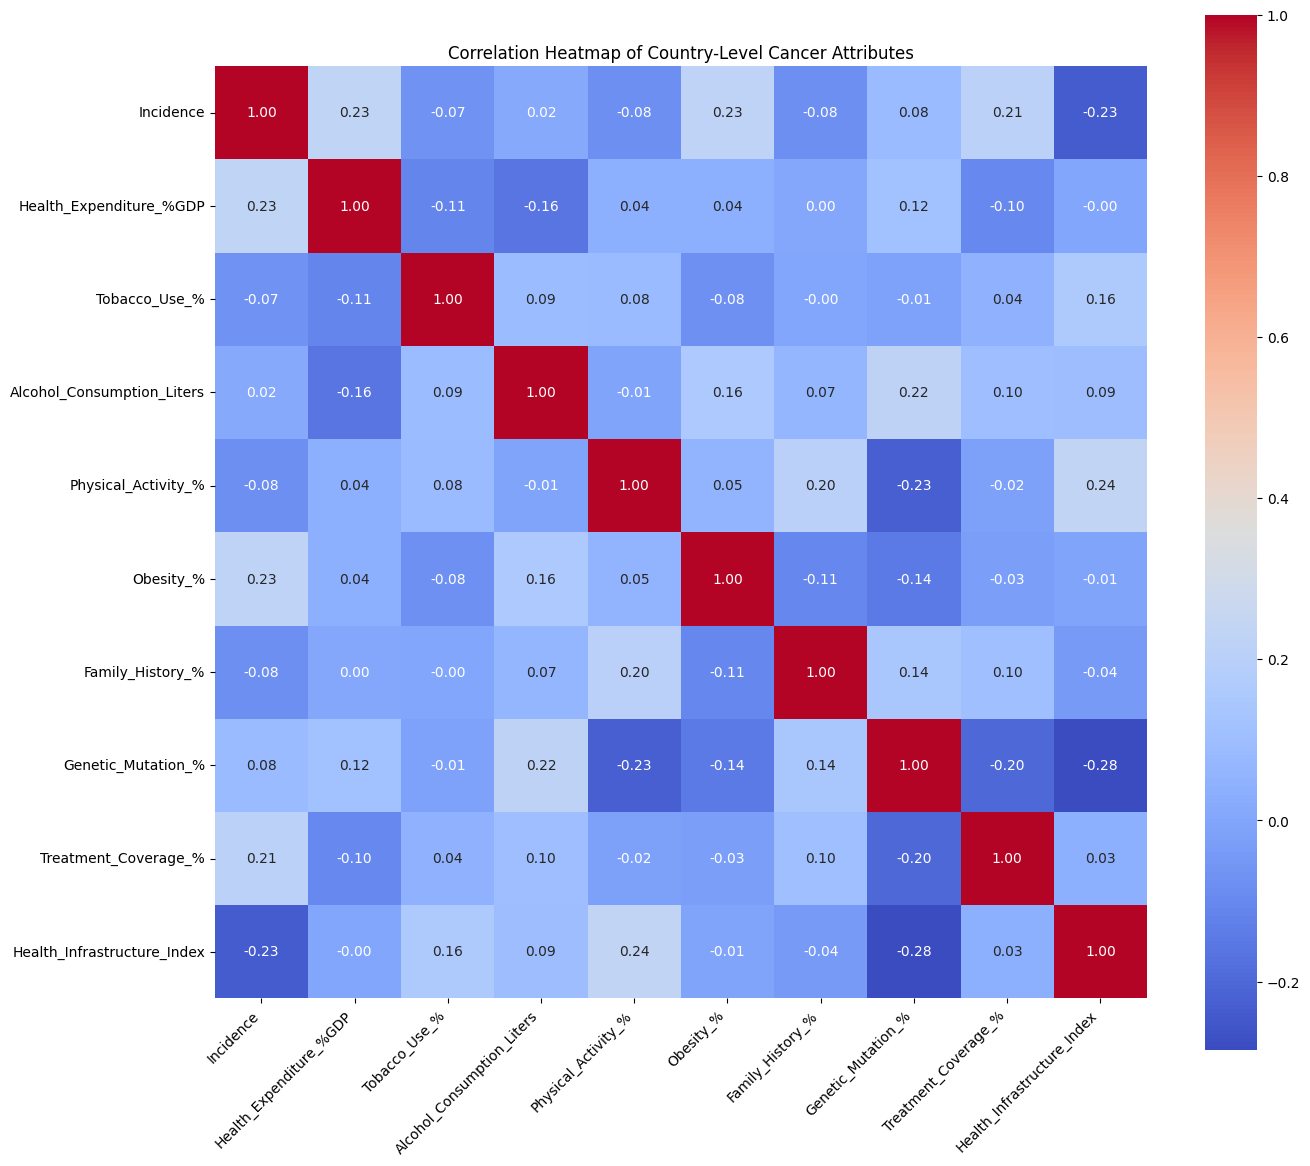

In [29]:
numeric_data = cancer_country_avg.drop(columns=['Country', 'Mortality', 'Prevalence', 'Education_Index', 'GDP_per_Capita', 
                                               'Air_Quality_Index', 'UV_Radiation', 'Urban_Population', 'Life_Expectancy',
                                               'Population_Density'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Country-Level Cancer Attributes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Heatmap
Heatmaps are used to see the correlation between attributes. If the correlation between two attributes is too high, we choose one of the attributes to study. 


## Methodology
#### RQ1
We used a combination of correlation analysis and linear regression modeling, and grouped countries by type (developed vs. developing). First, we used simple linear regression to model and visualize the relationship between these two variables in each group separately. We then calculated the correlation coefficients between cancer mortality and per capita medical expenditure for each group. This allowed us to directly compare the strength and direction of the association between healthcare expenditure and cancer mortality across different levels of economic development.

One of the advantages of this approach is its simplicity. This is an appropriate method for a dataset with a very small amount of data. However, a limitation of this method is that it can only capture linear relationships and is sensitive to outliers, which may bias the results. Also, due to the oversimplification problem, the results may not be able to interpret the whole research problem well.

#### RQ2
We employed a multivariable linear regression model to assess how tobacco use, alcohol consumption, and obesity rates relate to lung cancer prevalence. This approach allows us to estimate the relationship between one dependent variable (lung cancer prevalence) and multiple independent variables (the three lifestyle factors) simultaneously. By using a multivariable model, we can control for the influence of each factor while examining the others, isolating their individual associations with lung cancer prevalence. This method was chosen because it is a standard, interpretable way to quantify the impact of multiple risk factors on an outcome. In contrast to separate simple regressions, a multivariable regression considers all predictors together, which is crucial here since these lifestyle factors may co-occur and interact in the population. A linear model is appropriate as a first approximation given continuous variables and for ease of interpretation of coefficients.
While multivariable linear regression is a straightforward and interpretable method, it has several limitations in this context. It assumes linear relationships between predictors and the outcome, which may oversimplify complex biological processes like cancer development. Besides, The model cannot establish causality, only association, and is vulnerable to omitted variable bias if key factors like hepatitis infection or healthcare access are excluded. Limited variation in predictors also weakens statistical power, and using aggregated country-level data risks ecological fallacies when interpreting individual-level health outcomes.


## Results(Statement + Visualization)

#### RQ1

Developed countries (GDP per capita > $12,000) show a moderate negative correlation between health expenditure and cancer mortality (r = -0.48), suggesting that as health spending increases, cancer mortality tends to decrease. Developing countries, on the other hand, demonstrate a weak negative correlation (r = -0.15), indicating a much weaker relationship. This pattern is visualized in the faceted scatter plot with regression lines. The slope for developed countries is steeper, further supporting the stronger inverse relationship.

In [30]:
data = pd.read_csv("../data/processed/cleaned_data_rq1.csv")

data["Country_Type"] = data["GDP_per_Capita"].apply(
    lambda x: "Developed" if x >= 12000 else "Developing"
)

In [31]:
mortality_summary = data.groupby("Country_Type")["Mortality"].describe()
print(mortality_summary)

              count        mean       std     min       25%     50%     75%  \
Country_Type                                                                  
Developed       9.0  250.172222  2.288415  246.73  248.8300  250.08  252.26   
Developing     16.0  249.313750  2.719764  245.28  247.5125  248.79  251.02   

                 max  
Country_Type          
Developed     252.82  
Developing    254.15  


In [32]:
base_chart = alt.Chart(data).mark_circle(size=80, opacity=0.7, stroke='black', strokeWidth=0.5).encode(
    x=alt.X(
        "Current Health Expenditure (CHE) per Capita in US$",
        scale=alt.Scale(type='log'),
        title="Health Expenditure per Capita (US$)"
    ),
    y=alt.Y("Mortality", title="Average Cancer Mortality"),
    tooltip=["Country", "Mortality", "Current Health Expenditure (CHE) per Capita in US$", "GDP_per_Capita"]
)

regression_chart = base_chart.transform_regression(
    "Current Health Expenditure (CHE) per Capita in US$",
    "Mortality"
).mark_line(size=2, color='red')


final_plot = (base_chart + regression_chart)


facet_chart = final_plot.facet(
    column=alt.Column("Country_Type:N", title=None)
).properties(
    title="CHE per Capita vs Cancer Mortality by Country Type",
    bounds="flush"
)

facet_chart

alt.FacetChart(...)

In [33]:
# Pearson Correlation
for group in data["Country_Type"].unique():
    sub_df = data[data["Country_Type"] == group]
    corr = sub_df["Mortality"].corr(sub_df["Current Health Expenditure (CHE) per Capita in US$"])
    print(f"{group} correlation: {corr:.2f}")

Developing correlation: -0.15
Developed correlation: -0.48


#### RQ2

The multivariable linear regression model was built to examine how obesity (%), alcohol consumption, and tobacco use (%) relate to lung cancer prevalence among young adults (age 15–24) during the COVID-19 pandemic. The model yielded an R-squared of -0.01, indicating that it explained virtually none of the variability in cancer prevalence across countries. The mean absolute error was 502.18, and the root mean squared error was 564.48, suggesting a large prediction gap between observed and predicted values. Despite theoretical links between lifestyle and cancer risk, scatter plots and regression lines between each factor and cancer prevalence showed weak or no visible correlation:
Obesity: No clear pattern or trend.
Alcohol Consumption: Flat trend, negligible effect. 
Tobacco Use: Slight positive trend, but still inconclusive.


In [34]:
gcp_path = '../data/processed/cleaned_data_rq2.csv'
cancer_predictions_data = pd.read_csv(gcp_path)
cancer_predictions_data.head()

,Unnamed: 0,Country,Age_Group,Cancer_Type,Risk_Factors,Incidence,Mortality,Prevalence,Urban_Population,Health_Expenditure_%GDP,...,Air_Quality_Index,UV_Radiation,Family_History_%,Genetic_Mutation_%,Treatment_Coverage_%,GDP_per_Capita,Life_Expectancy,Health_Infrastructure_Index,Education_Index,Population_Density
0,0,Turkey,15-24,Lung,Obesity,44,457,955,32.906758,11.834005,...,96,2.877395,44.300862,6.924822,97.210912,29779,82.366306,2.324139,0.875452,736.609006
1,1,Canada,0-14,Prostate,Genetic,643,278,150,40.207750,6.412955,...,69,9.851073,17.727832,7.480867,98.658890,27570,56.791854,2.875398,0.730587,827.101915
2,2,China,15-24,Breast,Pollution,565,161,1428,62.225708,7.066045,...,10,3.156956,45.250388,17.109909,80.144866,50479,62.069261,1.502259,0.757807,139.180394
3,3,India,15-24,Leukemia,Inactivity,509,117,1996,84.119599,12.102488,...,179,6.364374,18.079635,5.280028,84.765434,67829,60.673865,8.945143,0.805388,776.916328
4,4,Nigeria,15-24,Prostate,Pollution,288,170,383,37.403640,14.487316,...,151,9.038135,20.292538,7.763366,81.781825,77986,66.400764,7.332599,0.748743,494.974242


In [35]:
cancer_age_group = cancer_predictions_data[cancer_predictions_data["Age_Group"] == '15-24']

Lung_age_group = cancer_age_group[cancer_age_group["Cancer_Type"] == "Lung"]

sorted_data = Lung_age_group[Lung_age_group["Risk_Factors"].isin(["Obesity", "Tobacco", "Alchohol"])]

In [36]:
# Feature Selection
X = sorted_data[["Obesity_%","Alcohol_Consumption_Liters",'Tobacco_Use_%']] #, "Alcohol_Consumption_Liters", "Obesity_%"
y = sorted_data["Prevalence"]

In [37]:
# Train Test Splite
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
print("R-squared (test set):", lr.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared (test set): -0.010587064921438127
Mean Absolute Error: 502.1751084178339
Root Mean Squared Error: 564.4840354927678


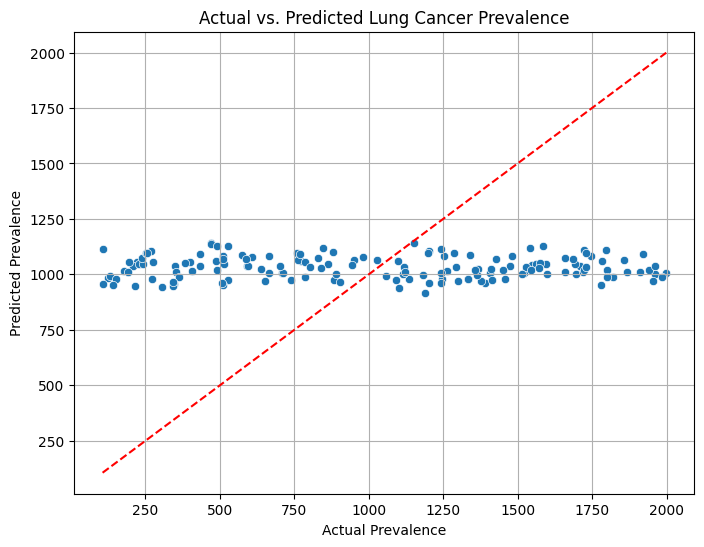

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prevalence")
plt.ylabel("Predicted Prevalence")
plt.title("Actual vs. Predicted Lung Cancer Prevalence")
plt.grid(True)
plt.show()

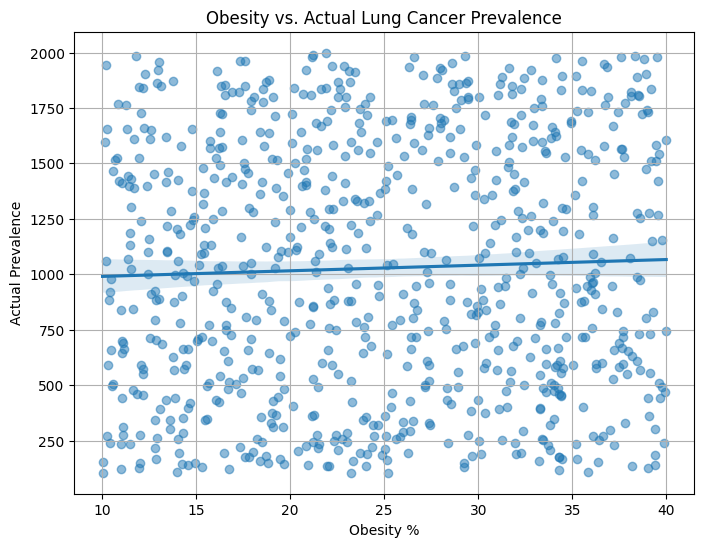

In [42]:
plt.figure(figsize=(8, 6))
sns.regplot(x=sorted_data["Obesity_%"], y=sorted_data["Prevalence"],scatter_kws={'alpha':0.5})
plt.xlabel("Obesity %")
plt.ylabel("Actual Prevalence")
plt.title("Obesity vs. Actual Lung Cancer Prevalence")
plt.grid(True)
plt.show()

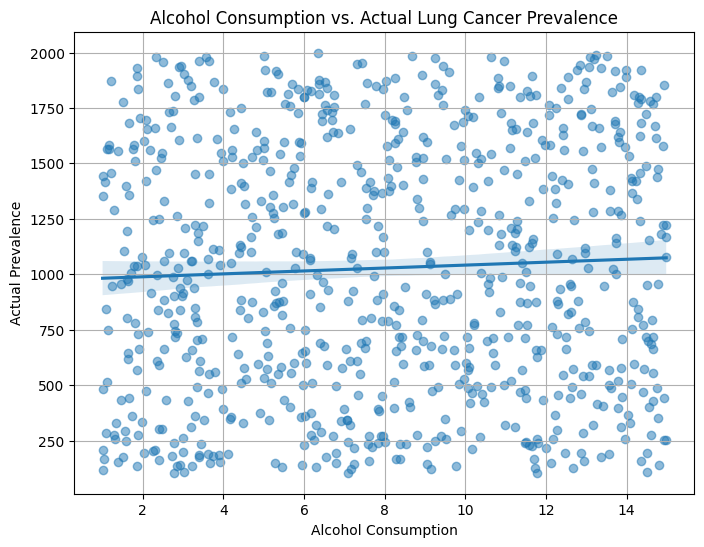

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(x=sorted_data["Alcohol_Consumption_Liters"], y=sorted_data["Prevalence"],scatter_kws={'alpha':0.5})
plt.xlabel("Alcohol Consumption")
plt.ylabel("Actual Prevalence")
plt.title("Alcohol Consumption vs. Actual Lung Cancer Prevalence")
plt.grid(True)
plt.show()

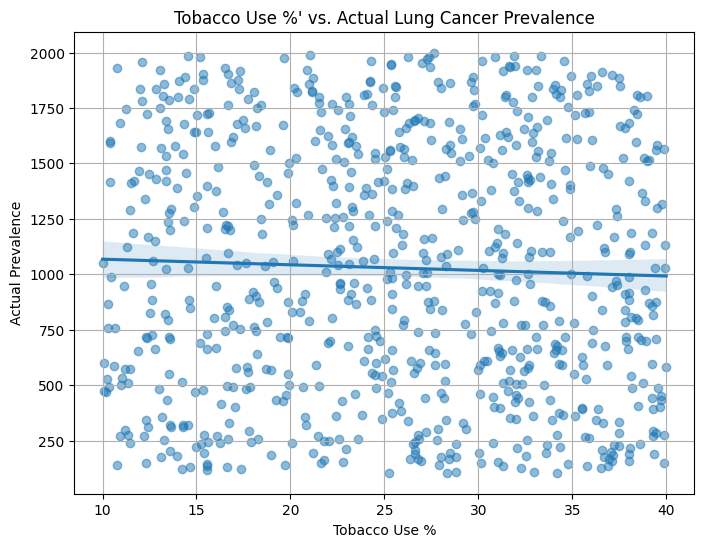

In [44]:
plt.figure(figsize=(8, 6))
sns.regplot(x=sorted_data['Tobacco_Use_%'], y=sorted_data["Prevalence"],scatter_kws={'alpha':0.5})
plt.xlabel('Tobacco Use %')
plt.ylabel("Actual Prevalence")
plt.title("Tobacco Use %' vs. Actual Lung Cancer Prevalence")
plt.grid(True)
plt.show()

## Results(Internal Validity)
#### RQ1
We cleaned the dataset thoroughly to ensure that the analysis accurately reflected the true structure of the data (correlations are susceptible to outliers). We used Pearson correlations and regression lines to directly measure the relationship between per capita healthcare expenditures and cancer mortality, which fit our research question perfectly.

#### RQ2
The internal validity of this multivariable linear regression model is limited. Although a standard regression approach was used, and each predictor was analyzed simultaneously to isolate their effects, the results suggest that the selected variables (obesity, alcohol, tobacco use) do not significantly predict lung cancer prevalence in this dataset. 

One possible reason is that the lifestyle factor values did not vary much across countries, which is our primary key for this dataset, limiting the model's ability to detect differences. Besides, lung cancer develops over many years, while lifestyle changes during the pandemic may not yet be reflected in current prevalence rates.


## Results(External Validity)
#### RQ1
The analysis uses real country-level data from multiple countries and reputable sources (e.g., the World Health Organization), increasing generalizability. However, the relatively small sample size (25 countries) and the exclusion of other important factors limit the scope of application of these findings.

#### RQ2
The generalizability of this model is also quite limited. The data is aggregated at the country level and reflects a very specific population segment (ages 15–24) during a global pandemic. Thus, the model output results may not apply to older age groups or individual-level associations. What’s more, cultural difference, socioeconomic, and regional differences that impact both lifestyle and cancer risk were not fully captured. As a result, the findings should not be used to inform individual-level predictions or policy decisions without further validation.


## Discussion(Results)
#### RQ1
Our results reveal a moderate negative correlation in developed countries (r = -0.48) and a weaker negative correlation in developing countries (r = -0.15). This suggests that higher investment in healthcare in wealthier nations may be more effective in reducing cancer mortality, potentially due to more efficient health systems, better infrastructure, and more comprehensive coverage. In contrast, the weaker correlation in developing countries may indicate diminishing returns or inefficiencies in how healthcare funding is utilized. Factors like limited access to care, fragmented health systems, or late-stage cancer diagnosis may undermine the impact of spending increases. However, the results of this study may not be significant. Because of the small size of the data after the two datasets were combined, and because we focused on only one variable, healthcare expenditures, the results of this study may not be meaningful. Likely, the results of this study do not provide a good explanation of the differences between developed and developing countries. For the interested community, the results of this study are not very meaningful.

#### RQ2
The multivariable regression analysis did not provide evidence that obesity, alcohol consumption, or tobacco use significantly influenced lung cancer prevalence in this sample. The extremely low R square, high error metrics, and inconclusive regression lines all point to weak or even nonexistent associations. However, this contradicts much of the epidemiological literature, where these lifestyle factors are typically linked to increased lung cancer risk. However, the disconnect may be due to the nature of the data selection. As the dataset is a cross-sectional, pandemic-period snapshot without sufficient variability or latency to capture these long-term effects.


## Discussion(Limitations)
#### RQ1
First and foremost, our sample size is relatively small, especially after merging datasets. Only 25 countries had complete and compatible data on both cancer mortality and healthcare expenditure, which limits the statistical power and may reduce the generalizability of the findings.

Second, another limitation lies in the lack of temporal granularity. Our merged dataset is based on country-level averages across years rather than year-by-year observations. This means we could not account for lag effects — such as whether investment in healthcare today impacts mortality rates several years later.

Finally, although the dataset from Kaggle claims that the data in the dataset is from an authoritative source, further research on the dataset revealed that some of the variables in the dataset may be problematic. This had a significant impact on our risk factors study.

#### RQ2
For research question 2, our study has several important limitations. First, the dependent variable used was lung cancer prevalence rather than incidence or mortality, and since lung cancer has a long latency period, the current prevalence may not accurately reflect recent lifestyle changes. Second, the data are aggregated at the national level, which masks significant within-country variations in obesity, alcohol use, smoking behaviour, and healthcare access. The combination of these factors raises the risk of ecological fallacy.  Lastly, since the data were collected during the COVID-19 pandemic—a time of global behavioural and healthcare disruption—the findings may not generalize to non-pandemic periods, limiting their external validity.


## Future Work
We would like to explore time-series data to understand how changes in healthcare expenditures over time affect cancer mortality, particularly lagged effects. In addition, we will also consider looking for more detailed and accurate data, in particular, the need to show the use of each attribute. This will allow for more accurate modelling and the use of advanced statistical methods such as panel regression or multivariate analysis. Moreover, if we want to go further in our research about how lifestyle factors impact lung cancer prevalence, it is necessary to find a more comprehensive and meaningful dataset. For example, a dataset that records a batch of individuals with lung cancer and their lifestyle (e.g., frequency and quantity of tobacco use or the percentage of overweight compared to a benchmark for a specific age group). Instead of using countries as our independent variable, we should use individuals to get a valid and more reasonable result.


## References
[1] Singh, S.R. 2014. Public Health Spending and Population Health: A Systematic Review. American Journal of Preventive Medicine. 47, 5 (Nov. 2014), 634–640. DOI:https://doi.org/10.1016/j.amepre.2014.05.017.

[2] Rahman, Md.M. et al. 2025. Synergy of health cost, globalization and good health: Evidence from emerging economies. Regional Science Policy & Practice. 17, 6 (Jun. 2025), 100183. DOI:https://doi.org/10.1016/j.rspp.2025.100183.

[3] Malhotra, J. et al. 2016. Risk factors for lung cancer worldwide. The European Respiratory Journal. 48, 3 (Sep. 2016), 889–902. DOI:https://doi.org/10.1183/13993003.00359-2016.

## AI Use Declaration

We used AI to refine our writings, give some suggestions for Methodology since we don't too many samples in the merged dataset.